# Π Study
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 9/10/2021|

## Python Imports

In [2]:
import sys
sys.path.insert(0, '/home/stanley/github/sabaronett/local/athena/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.colors as colors
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import pandas as pd
from pathlib import Path
from scipy import fft
from scipy.optimize import curve_fit

# AB
$\tau_S=0.1,\,\epsilon=1.0$

## Dust

### Dust Density Dispersion

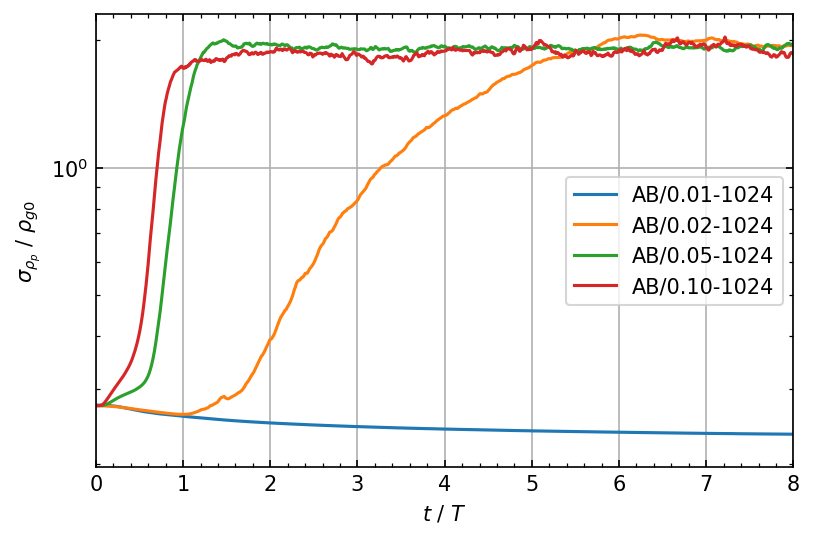

In [29]:
fig, ax = plt.subplots(dpi=150)
runs = ['AB/0.01-1024', 'AB/0.02-1024', 'AB/0.05-1024', 'AB/0.10-1024']

for run in runs:
    hst = athena_read.hst('../nonlinear/Pi/%s/output/SI.hst'%run)
    times = hst['time']
    rhop_amps = np.sqrt(hst['drhop2'] - hst['drhop']**2)
    ax.semilogy(times, rhop_amps, label=run)

ax.set(xlabel=r'$t$ / $T$', ylabel=r'$\sigma_{\rho_p}$ / $\rho_{g0}$',
       xlim=(0, 8))
ax.minorticks_on()
ax.tick_params(axis='both', which='both', top=True, right=True, direction='in')
ax.legend()
ax.grid()

### CPDD

AB/0.02-1024  : 27.9% ρₚ = 0
AB/0.05-1024  : 30.3% ρₚ = 0
AB/0.10-1024  : 27.7% ρₚ = 0


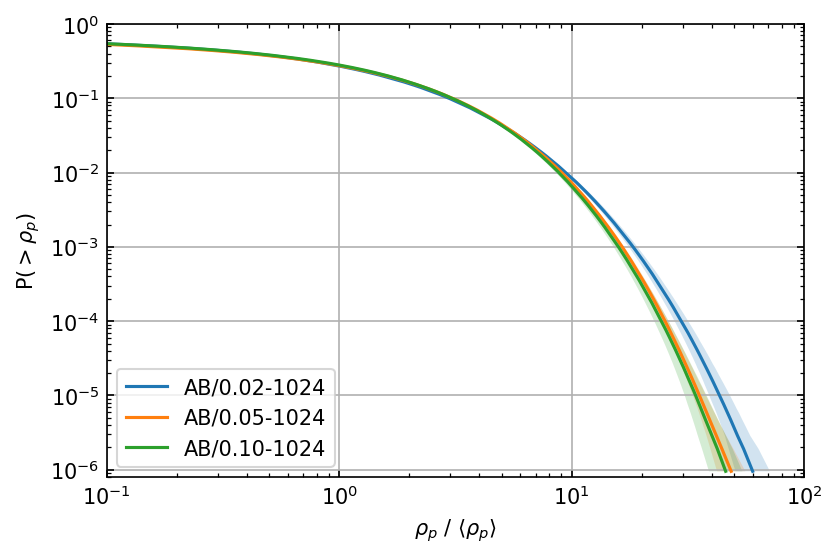

In [21]:
fig, ax = plt.subplots(dpi=150)
runs = ['AB/0.02-1024', 'AB/0.05-1024', 'AB/0.10-1024']

for run in runs:
    athinput = athena_read.athinput('../nonlinear/Pi/%s/athinput.si'%run)
    data = np.load('../nonlinear/Pi/%s/output/cpdd.npz'%run)
    nonzeros = np.count_nonzero(data['avgs'])
    size = data['avgs'].size
    zeros = size - nonzeros
    print('{:<14s}: {:.1f}% ρₚ = 0'.format(run, 100*zeros/size))
    ax.loglog(data['avgs'], data['cdf'], label=run)
    ax.fill_betweenx(data['cdf'], data['avgs']/data['stds'],
                     data['avgs']*data['stds'], alpha=0.2)
    
ax.minorticks_on()
ax.tick_params(axis='both', which='both', top=True, right=True, direction='in')
ax.set(xlim=(1e-1, 1e2), ylim=(8e-7, 1),
       xlabel=r'$\rho_p$ / $\langle \rho_p \rangle$',
       ylabel=r'P$(>\rho_p)$')
ax.legend(ncol=1, loc='lower left')
ax.grid()

### Saturation Morphology

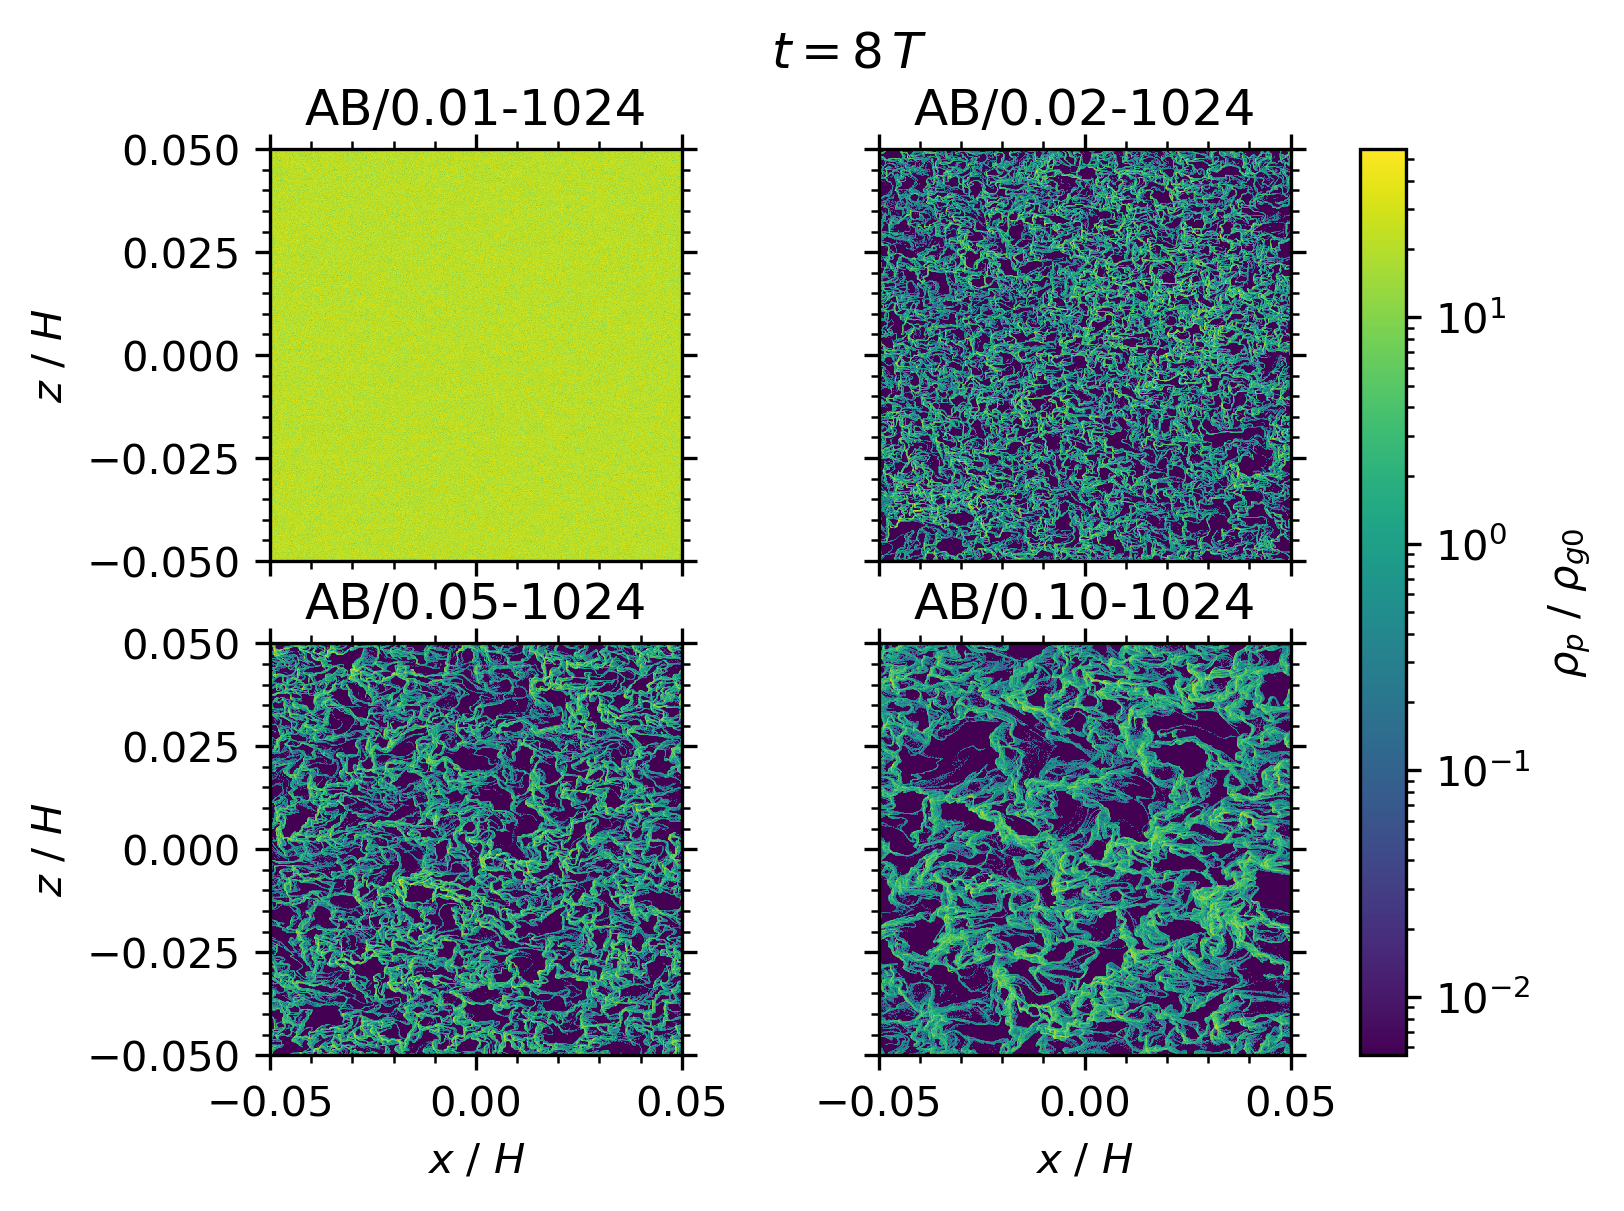

In [9]:
fig, axs = plt.subplots(2, 2, dpi=300)
runs = ['AB/0.01-1024', 'AB/0.02-1024', 'AB/0.05-1024', 'AB/0.10-1024']
vmax, vmag = 0, 1e4

for i,ax in enumerate(axs.flat):
    # Load run snapshot
    athinput = athena_read.athinput('../nonlinear/Pi/%s/athinput.si'%runs[i])
    c_s = athinput['hydro']['iso_sound_speed'] # sound speed
    Omega = athinput['problem']['omega']       # local Keplerian angular frequency
    H = c_s/Omega                              # gas scale height
    T = 2*np.pi/Omega                          # orbital period
    data = athena_read.athdf('../nonlinear/Pi/%s/athdf/'%runs[i]\
                             +athinput["job"]["problem_id"]+'.out2.02000.athdf')
    if np.amax(data['rhop'][0]) > vmax:
        vmax = np.amax(data['rhop'][0])
    xf, zf = data['x1f']/H, data['x2f']/H
    clip = np.clip(data['rhop'][0], vmax/vmag, vmax)
    
    # Plot
    img = ax.pcolormesh(xf, zf, clip, norm=colors.LogNorm(vmax/vmag, vmax))
    ax.set(title=r'{:s}'.format(runs[i]), aspect='equal',
           xlabel=r'$x$ / $H$', ylabel=r'$z$ / $H$')
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)
fig.suptitle(r'$t = {:.0f}\,T$'.format(data['Time']/T))
cb = fig.colorbar(img, ax=axs[:,:])
cb.set_label(r'$\rho_p$ / $\rho_{g0}$')

# BA
$\tau_S=1.0,\,\epsilon=0.2$

## Dust

### Dust Density Dispersion

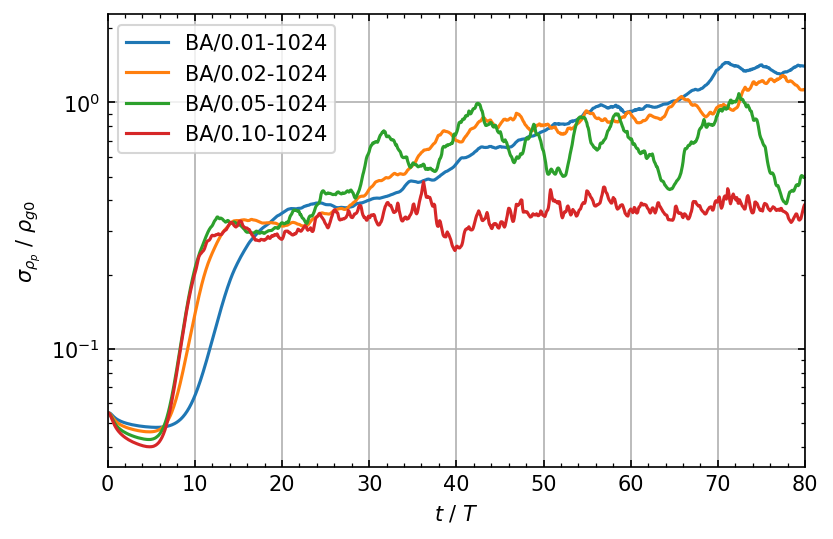

In [31]:
fig, ax = plt.subplots(dpi=150)
runs = ['BA/0.01-1024', 'BA/0.02-1024', 'BA/0.05-1024', 'BA/0.10-1024']

for run in runs:
    hst = athena_read.hst('../nonlinear/Pi/%s/output/SI.hst'%run)
    times = hst['time']
    rhop_amps = np.sqrt(hst['drhop2'] - hst['drhop']**2)
    ax.semilogy(times, rhop_amps, label=run)

ax.set(xlabel=r'$t$ / $T$', ylabel=r'$\sigma_{\rho_p}$ / $\rho_{g0}$',
       xlim=(0, 80))
ax.minorticks_on()
ax.tick_params(axis='both', which='both', top=True, right=True, direction='in')
ax.legend()
ax.grid()

### CPDD

BA/0.01-1024  : 6.8% ρₚ = 0
BA/0.02-1024  : 1.1% ρₚ = 0
BA/0.05-1024  : 0.9% ρₚ = 0
BA/0.10-1024  : 0.0% ρₚ = 0


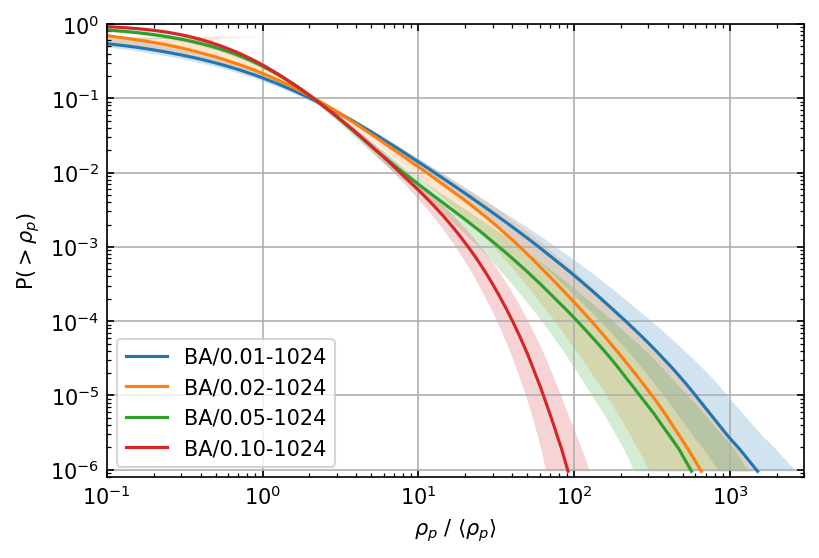

In [ ]:
fig, ax = plt.subplots(dpi=150)
runs = ['BA/0.01-1024', 'BA/0.02-1024', 'BA/0.05-1024', 'BA/0.10-1024']

for run in runs:
    athinput = athena_read.athinput('../nonlinear/Pi/%s/athinput.si'%run)
    data = np.load('../nonlinear/Pi/%s/output/cpdd.npz'%run)
    nonzeros = np.count_nonzero(data['avgs'])
    size = data['avgs'].size
    zeros = size - nonzeros
    print('{:<14s}: {:.1f}% ρₚ = 0'.format(run, 100*zeros/size))
    ax.loglog(data['avgs'], data['cdf'], label=run)
    ax.fill_betweenx(data['cdf'], data['avgs']/data['stds'],
                     data['avgs']*data['stds'], alpha=0.2)
    
ax.minorticks_on()
ax.tick_params(axis='both', which='both', top=True, right=True, direction='in')
ax.set(xlim=(0.1, 3e3), ylim=(8e-7, 1),
       xlabel=r'$\rho_p$ / $\langle \rho_p \rangle$',
       ylabel=r'P$(>\rho_p)$')
ax.legend(ncol=1, loc='lower left')
ax.grid()

### Saturation Morphology

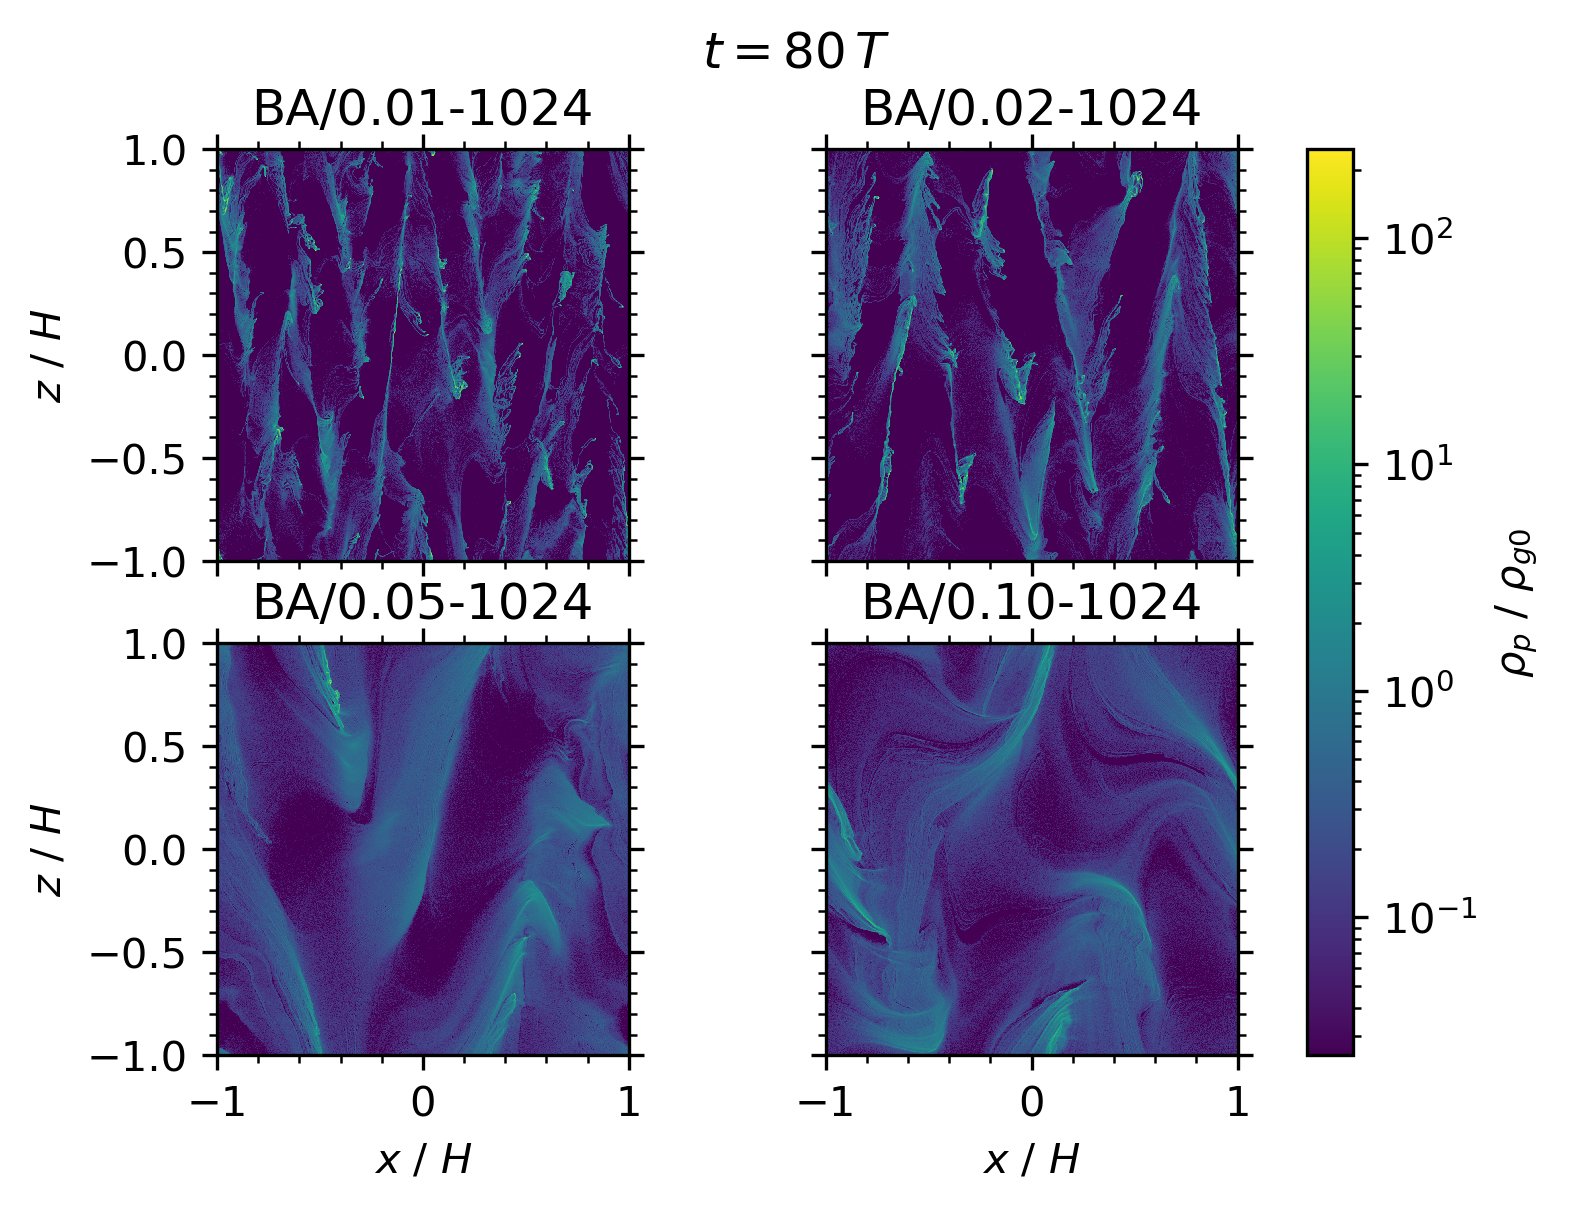

In [10]:
fig, axs = plt.subplots(2, 2, dpi=300)
runs = ['BA/0.01-1024', 'BA/0.02-1024', 'BA/0.05-1024', 'BA/0.10-1024']
vmax, vmag = 0, 1e4

for i,ax in enumerate(axs.flat):
    # Load run snapshot
    athinput = athena_read.athinput('../nonlinear/Pi/%s/athinput.si'%runs[i])
    c_s = athinput['hydro']['iso_sound_speed'] # sound speed
    Omega = athinput['problem']['omega']       # local Keplerian angular frequency
    H = c_s/Omega                              # gas scale height
    T = 2*np.pi/Omega                          # orbital period
    data = athena_read.athdf('../nonlinear/Pi/%s/athdf/'%runs[i]\
                             +athinput["job"]["problem_id"]+'.out2.02000.athdf')
    if np.amax(data['rhop'][0]) > vmax:
        vmax = np.amax(data['rhop'][0])
    xf, zf = data['x1f']/H, data['x2f']/H
    clip = np.clip(data['rhop'][0], vmax/vmag, vmax)
    
    # Plot
    img = ax.pcolormesh(xf, zf, clip, norm=colors.LogNorm(vmax/vmag, vmax))
    ax.set(title=r'{:s}'.format(runs[i]), aspect='equal',
           xlabel=r'$x$ / $H$', ylabel=r'$z$ / $H$')
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)
fig.suptitle(r'$t = {:.0f}\,T$'.format(data['Time']/T))
cb = fig.colorbar(img, ax=axs[:,:])
cb.set_label(r'$\rho_p$ / $\rho_{g0}$')